In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt

In [42]:

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


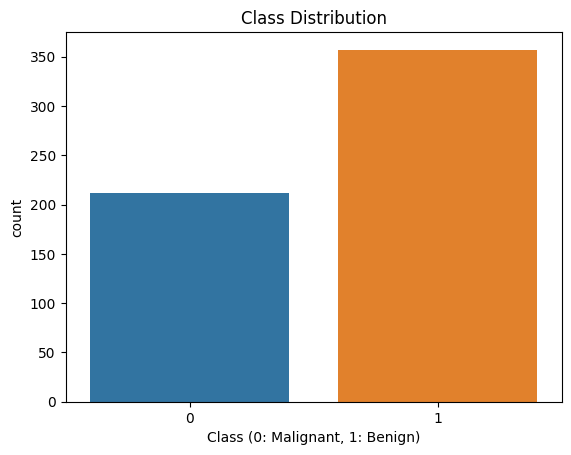

In [45]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class (0: Malignant, 1: Benign)")
plt.show()

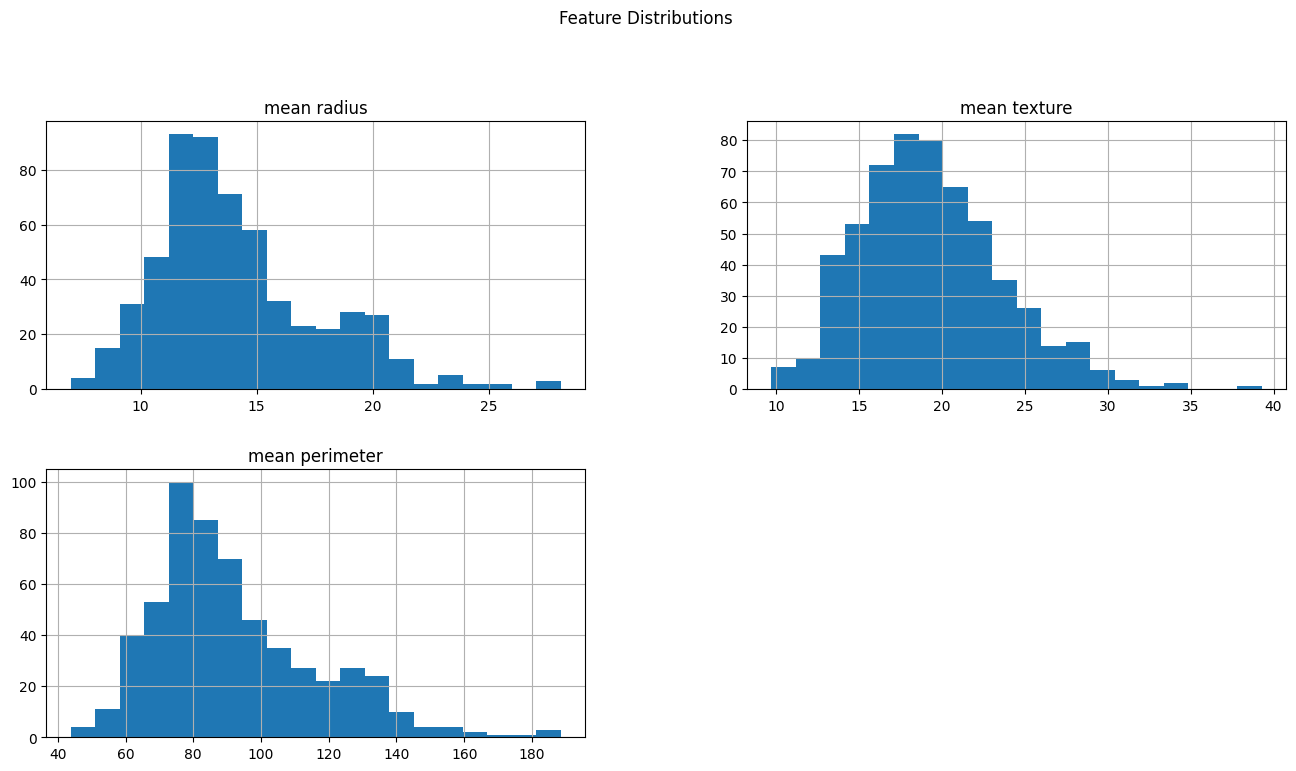

In [46]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter']
df[selected_features].hist(bins=20, figsize=(16, 8))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


In [47]:
k = 10
selector = SelectKBest(score_func=f_classif, k=k)

X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

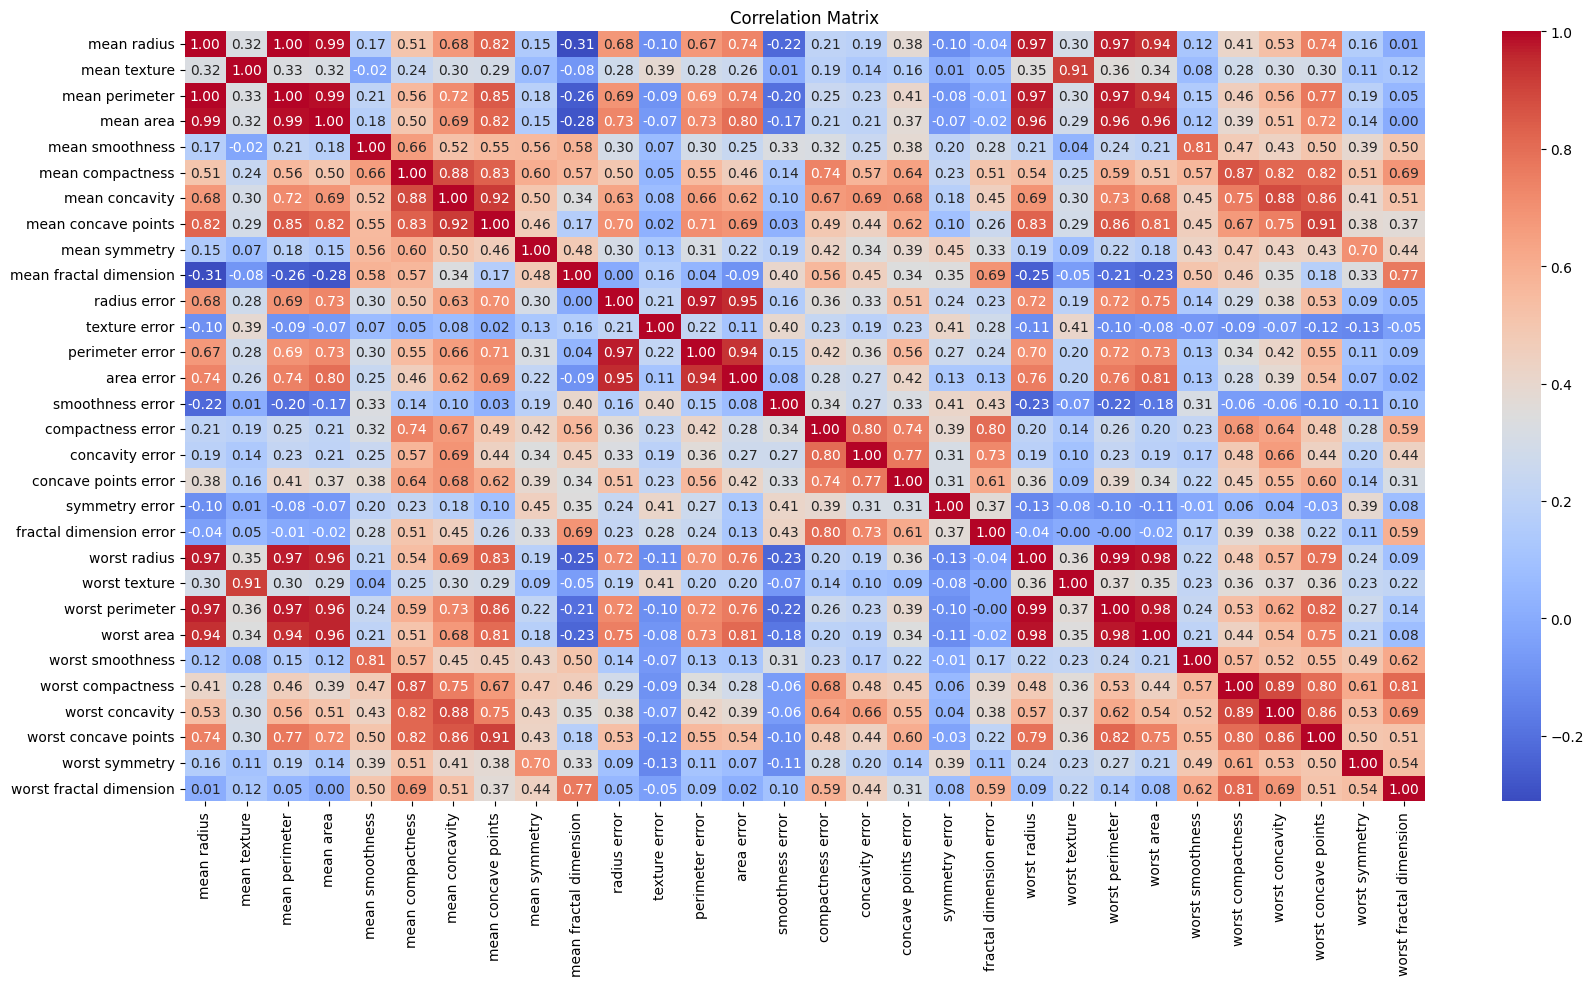

In [48]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [49]:


logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_selected, y_train)

y_pred = logistic_regression_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression Model:", accuracy)

Accuracy of the Logistic Regression Model: 0.9649122807017544


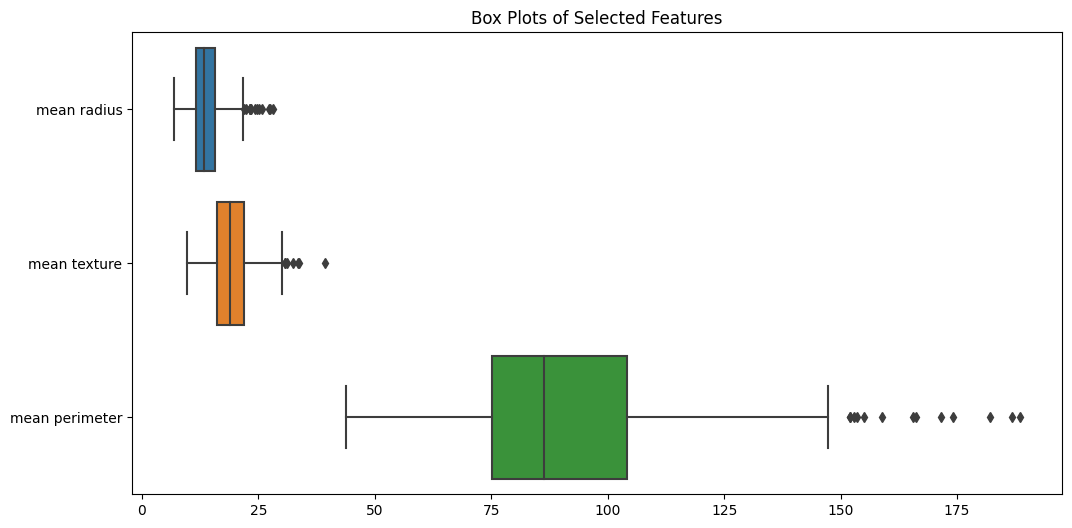

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_features], orient="h")
plt.title("Box Plots of Selected Features")
plt.show()


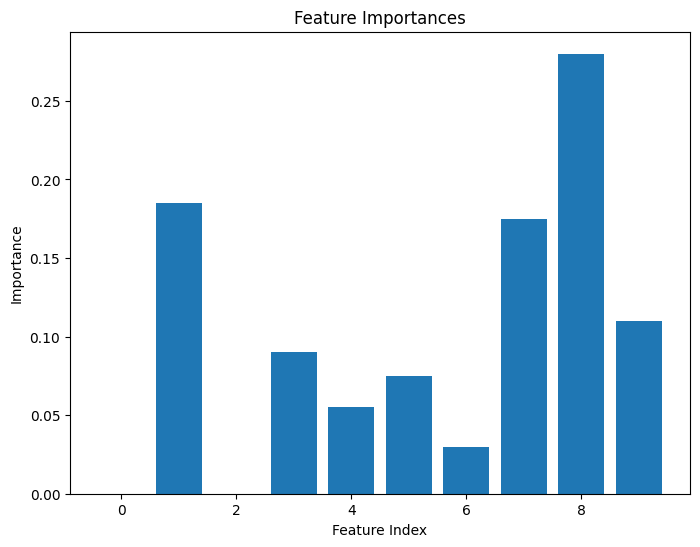

Accuracy of AdaBoost Classifier: 0.9532163742690059


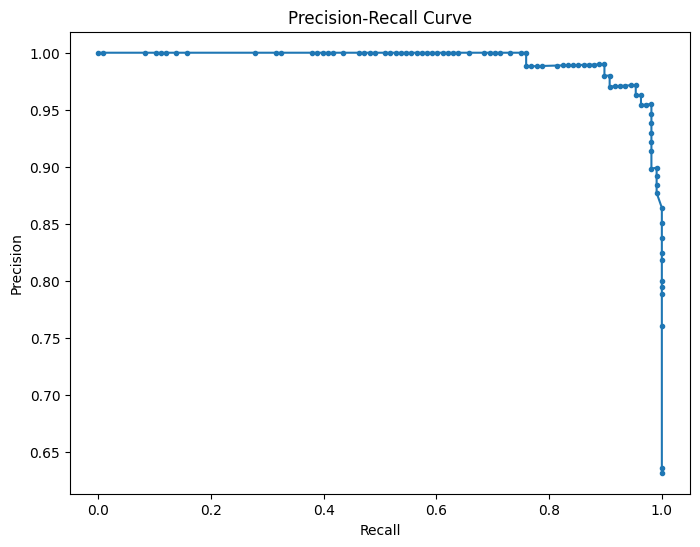

F1 =  0.9629629629629629


In [51]:
adaboost_model = AdaBoostClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
optimal_n_estimators = grid_search.best_params_['n_estimators']

param_grid = {'learning_rate': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
optimal_learning_rate = grid_search.best_params_['learning_rate']

adaboost_model = AdaBoostClassifier(n_estimators=optimal_n_estimators, learning_rate=optimal_learning_rate, random_state=42)
adaboost_model.fit(X_train_selected, y_train)
feature_importances = adaboost_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

y_pred_adaboost = adaboost_model.predict(X_test_selected)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy of AdaBoost Classifier:", accuracy_adaboost)
precision, recall, _ = precision_recall_curve(y_test, adaboost_model.predict_proba(X_test_selected)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

f1_score_adaboost = f1_score(y_test, y_pred_adaboost)
print("F1 = ", f1_score_adaboost)


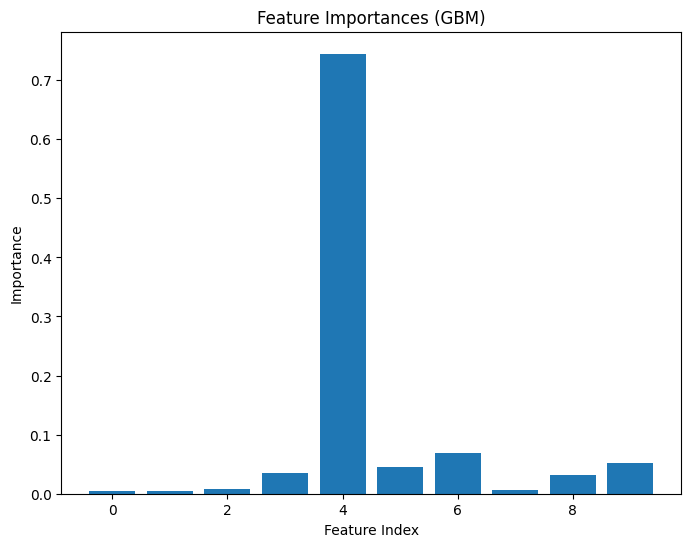

Accuracy of GBM Classifier: 0.9473684210526315


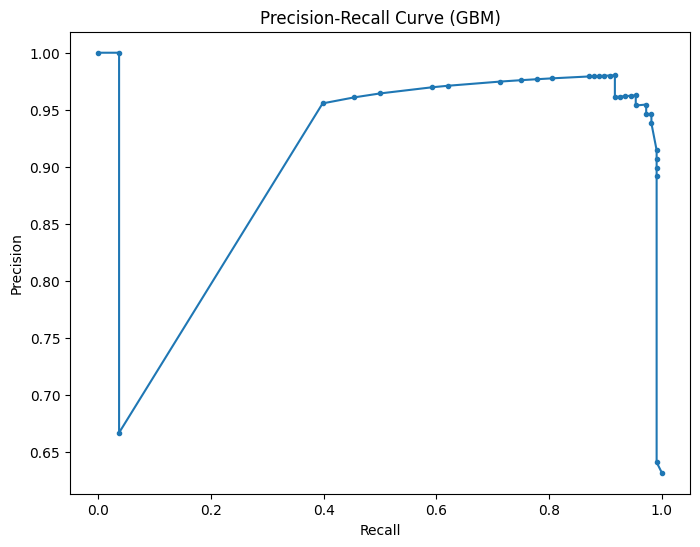

F1 Score of GBM Classifier: 0.9589041095890412


In [52]:
gbm_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(gbm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_params = grid_search.best_params_

gbm_model = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)
gbm_model.fit(X_train_selected, y_train)

feature_importances = gbm_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances (GBM)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

y_pred_gbm = gbm_model.predict(X_test_selected)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy of GBM Classifier:", accuracy_gbm)

precision, recall, _ = precision_recall_curve(y_test, gbm_model.predict_proba(X_test_selected)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve (GBM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

f1_score_gbm = f1_score(y_test, y_pred_gbm)
print("F1 Score of GBM Classifier:", f1_score_gbm)

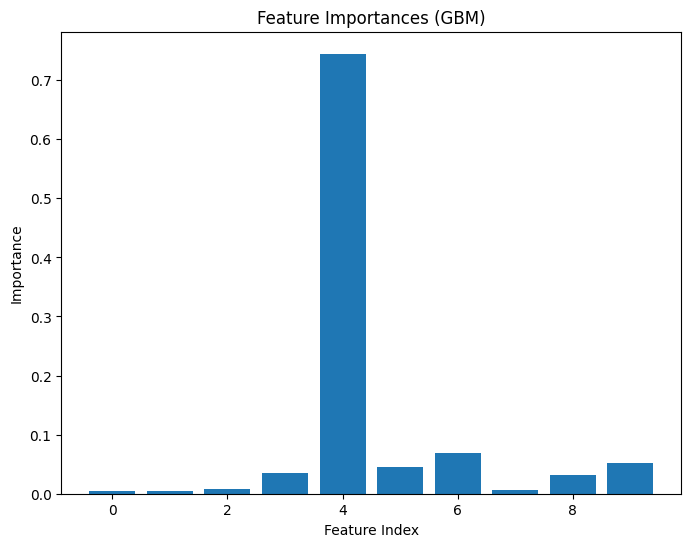

In [53]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.title("Feature Importances (GBM)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

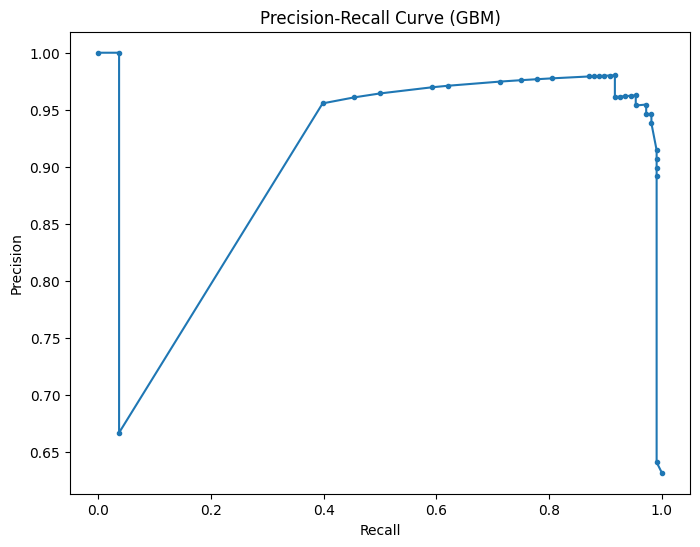

In [54]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, gbm_model.predict_proba(X_test_selected)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve (GBM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

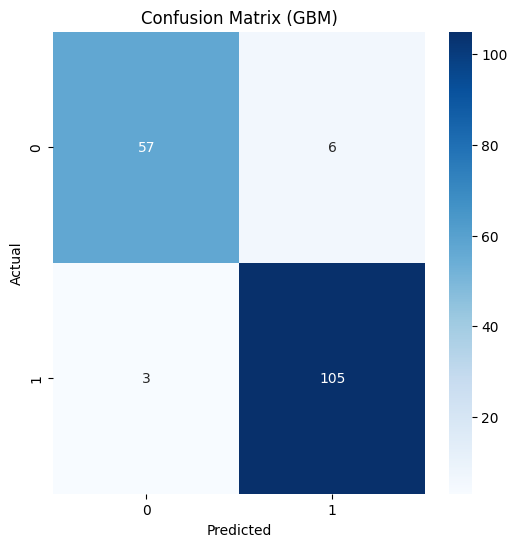

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_gbm)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GBM)")
plt.show()

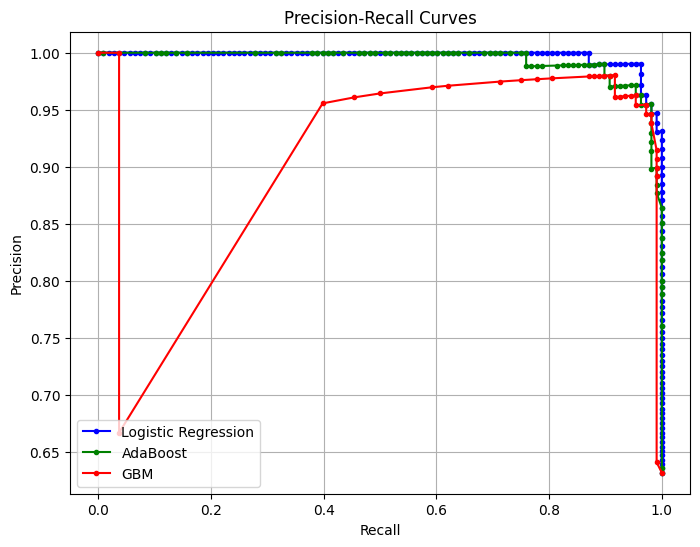

In [56]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, logistic_regression_model.predict_proba(X_test_selected)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression', color='blue')

precision_ab, recall_ab, _ = precision_recall_curve(y_test, adaboost_model.predict_proba(X_test_selected)[:, 1])
plt.plot(recall_ab, precision_ab, marker='.', label='AdaBoost', color='green')

precision_gbm, recall_gbm, _ = precision_recall_curve(y_test, gbm_model.predict_proba(X_test_selected)[:, 1])
plt.plot(recall_gbm, precision_gbm, marker='.', label='GBM', color='red')

plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [57]:
models = [logistic_regression_model, adaboost_model, gbm_model]
model_names = ["Logistic Regression", "AdaBoost", "Gradient Boosting Machine"]
results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_selected)[:, 1])
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, f1, precision, recall])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])
print(results_df)


                       Model  Accuracy  F1 Score  \
0        Logistic Regression  0.964912  0.971963   
1                   AdaBoost  0.953216  0.962963   
2  Gradient Boosting Machine  0.947368  0.958904   

                                           Precision  \
0  [0.631578947368421, 0.6352941176470588, 0.6390...   
1  [0.631578947368421, 0.6352941176470588, 0.7605...   
2  [0.631578947368421, 0.6407185628742516, 0.8916...   

                                              Recall  
0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
1  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  
2  [1.0, 0.9907407407407407, 0.9907407407407407, ...  


In [58]:
from sklearn.model_selection import cross_val_score

logistic_regression_cv_scores = cross_val_score(logistic_regression_model, X_train_selected, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy_lr = logistic_regression_cv_scores.mean()
print("CV(Logistic Regression):", mean_cv_accuracy_lr)

adaboost_cv_scores = cross_val_score(adaboost_model, X_train_selected, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy_ab = adaboost_cv_scores.mean()
print("CV (AdaBoost):", mean_cv_accuracy_ab)


gbm_cv_scores = cross_val_score(gbm_model, X_train_selected, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy_gbm = gbm_cv_scores.mean()
print("CV (GBM):", mean_cv_accuracy_gbm)


CV(Logistic Regression): 0.9472151898734177
CV (AdaBoost): 0.9446835443037973
CV (GBM): 0.9372784810126582
